In [1]:
import os

from keras.applications.vgg16 import VGG16, preprocess_input


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import keras
from tensorflow.keras.applications import DenseNet121

from tensorflow.keras import layers, models, Model

# preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.image import rgb_to_grayscale

from warnings import filterwarnings

filterwarnings('ignore')
%matplotlib inline

In [2]:
# conn = models.load_model("./../../src/models/2020-12-02tim-1.HDF5/")
from keras.applications.densenet import DenseNet121, preprocess_input

In [58]:
# Summarize layers in model
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [59]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[2].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [82]:
def viz_filters(fit_model, layer=1, filter_to_viz=6, channels=3, figsize=(2,6)):
    
    #  Get the weights from the layer of interest
    filters, biases = model.layers[layer].get_weights()
    
    # normalize the filter values for visualization
    f_min, f_max = filters.min(), filters.max()
    # manual minmax scaling
    filters = (filters - f_min) / (f_max - f_min)
    
    n_filters, ix = filter_to_viz, 1
    
    fig, ax = plt.subplots(nrows=filter_to_viz,
                           ncols=filter_to_viz,
                           figsize=figsize)
    
    for i in range(n_filters):
        f = filters[:, :, :, i]
        for j in range(channels):
            ax[i,j] = plt.subplot(n_filters, channels, ix)
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            plt.imshow(f[:,:,j], cmap='gray',)
            ix += 1
    plt.show();
    

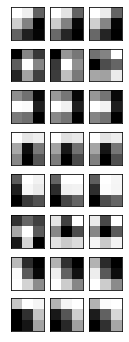

In [83]:
viz_filters(model, filter_to_viz=8)

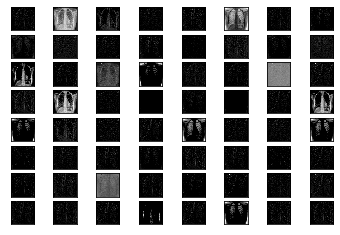

In [97]:
model_copy = Model(inputs=model.inputs, outputs=model.layers[1].output)

# establish the image path
PATH = os.getcwd() + '/../../src/data/chest_xray/'

# retrieve an image to evaluate
image_path = PATH+'train/NORMAL/'
image_list = os.listdir(image_path) 

image_dir = image_path + image_list[0]

# import the image 
img = image.load_img(image_dir, target_size=(224, 224))

# convert image to an array
img_arr = img_to_array(img)

# Expand dimensions
img_arr = np.expand_dims(img_arr, axis=0)

# preprocess array
img_pre = preprocess_input(img_arr)

# get predictions
feature_maps = model_copy.predict(img_pre)

# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
# plt.figure(figsize=(12,6))
plt.show()

In [85]:
model.layers

In [137]:
img = image.load_img(image_dir, target_size=(224, 224))

def computer_vision(fit_model, image, layer=1, filters=64, all_blocks=False, block_idx = []):
    """
    currently works for just one layer, still trying to get multiple blocks to print.
    """
    model = fit_model
    block_flag = False
    # If all blocks are to be visualized
    if all_blocks and block_idx:
        outputs = [model.layer[i].output for i in block_idx]
        model = Model(inputs=model.inputs, outputs = outputs)
        block_flag = True
        
    elif all_blocks and not block_idx:
        print("Please enter the block idx to be visualized")
        return False
    
    else:
        # Make a temporary model with 1 layer of interest
        model = Model(inputs=model.inputs, outputs=model.layers[layer].output)
    
    # convert image to an array
    img_arr = img_to_array(image)
    
    # Expand dimensions
    img_arr = np.expand_dims(img_arr, axis=0)
    
    # preprocess array
    img_pre = preprocess_input(img_arr)
    
    # get predictions
    feature_maps = model.predict(img_pre)
    
    
    # plot all 
    square = int(filters**0.5)
    ix = 1
    
    fig, ax = plt.subplots(nrows=square, ncols=square, figsize=(12,6))
    
    if block_flag:
        print("Watch this space")
        return False
    else:
        for i in range(square):
            for j in range(square):
                # specify subplot and turn of axis
                ax[i,j].set_xticks([])
                ax[i,j].set_yticks([])
                # plot filter channel in grayscale
                ax[i,j].imshow(feature_maps[0, :, :, ix-1], cmap='gray')
                ix += 1
        # show the figure
        plt.show()

In [138]:
#     else:
#         for _ in range(square):
#             for _ in range(square):
#                 # specify subplot and turn of axis
#                 ax = plt.subplot(square, square, ix)
#                 ax.set_xticks([])
#                 ax.set_yticks([])
#                 # plot filter channel in grayscale
#                 plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
#                 ix += 1
#         # show the figure
#         plt.show()

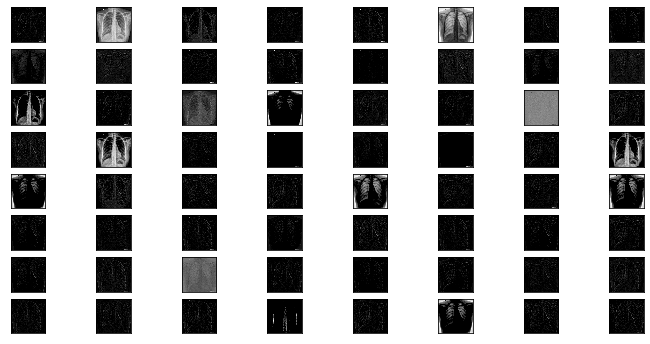

In [139]:
computer_vision(model ,img)

In [113]:
feature_maps = model_copy.predict(img_pre)

In [118]:
feature_maps
def foo():
    square = int(8)
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    plt.show()

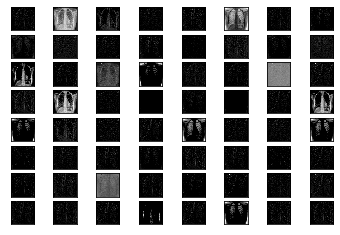

In [119]:
foo()